In [57]:
import matplotlib.pyplot as plt
from models import BassDiffusionModel
import numpy as np
import networkx as nx
from tqdm import tqdm

import pandas as pd
import pickle
from functools import partial
from scipy.integrate import odeint

models/bass_diffusion.py

In [90]:
# theoretical resuts

def get_theo_res(p,q,t):
    # function that returns dy/dt
    def model(F, t, p, q):
        dFdt = p*(1-F) + q*(1-F)*F
        return dFdt

    params = {
        'p': p,
        'q': q
    }
    partial_model = partial(model, **params)


    # solve ODE
    y = odeint(partial_model,0,t)
    return [it[0] for it in y]

In [77]:
def get_total_plot(vals, theo_vals = None):
    plt.figure(figsize=(10,5))
    x = range(len(vals))
    plt.fill_between(x, np.zeros(len(vals)),[it[0] for it in vals], label='innovators')
    plt.fill_between(x,[it[0] for it in vals], [np.sum(it) for it in vals], label='imitators')
    # plt.plot(x, [np.sum(it) for it in vals])
    if theo_vals:
        p = theo_vals["p"]
        q = theo_vals["q"]
        y = get_theo_res(p,q,x)
        plt.plot(x,[it*1000 for it in y],'r--', label='theoretic values')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel(' num of adapters')
    plt.legend()
    plt.show()

In [46]:
def get_density_plot(vals):
    plt.figure(figsize=(10,5))
    x = range(1, len(vals))
    innovators = [it[0] for it in vals]
    imitators = [it[1] for it in vals]

    new_innovators = [it - innovators[i-1] for i, it in enumerate(innovators) if i != 0]
    new_imitators = [it - imitators[i-1] for i, it in enumerate(imitators) if i != 0]
    plt.plot(x, new_innovators, label='innovators')
    plt.plot(x, new_imitators, label='imitators')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel(' num of adapters')
    plt.legend()
    plt.show()

In [ ]:
get_theo_res(p=0.03,q=0.2,t=range(25))

In [59]:
y

array([[0.        ],
       [0.00549727],
       [0.01186017],
       [0.01921062],
       [0.02768276],
       [0.03742237],
       [0.04858569],
       [0.06133704],
       [0.07584547],
       [0.09227983],
       [0.11080217],
       [0.1315596 ],
       [0.15467431],
       [0.18023242],
       [0.20827193],
       [0.23877086],
       [0.2716368 ],
       [0.3066992 ],
       [0.343706  ],
       [0.38232569],
       [0.42215573],
       [0.46273716],
       [0.50357469],
       [0.54416051],
       [0.58399911],
       [0.62263115],
       [0.6596535 ],
       [0.69473401],
       [0.72761989],
       [0.75813991],
       [0.786201  ],
       [0.81178063],
       [0.8349163 ],
       [0.85569375],
       [0.87423494],
       [0.89068679],
       [0.90521127],
       [0.91797719],
       [0.9291536 ],
       [0.93890492],
       [0.94738743],
       [0.95474704],
       [0.96111798],
       [0.96662228],
       [0.9713698 ],
       [0.97545864],
       [0.97897575],
       [0.981

In [78]:
""" check. """
params = {
    "network_size": 1000,
    "innovators": 0,
    "imitators": 0
}
MC = 1000

all_vals = []
for _ in range(MC):
    q_voter = BassDiffusionModel(**params)
    temp_vals = q_voter.simulate(0.01, 0.3)
    all_vals.append(temp_vals)


# get avg results:
vals = []
time = min(len(it) for it in all_vals)
for i in range(time):
    avg_innovator = np.mean([it[i][0] for it in all_vals])
    avg_imitator = np.mean([it[i][1] for it in all_vals])
    vals.append([avg_innovator, avg_imitator])

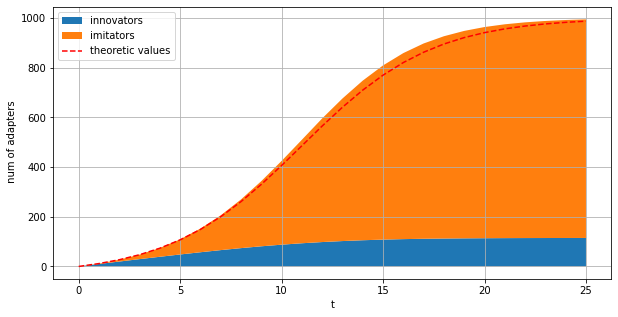

In [79]:
get_total_plot(vals, theo_vals={'p':0.01, 'q':0.3})

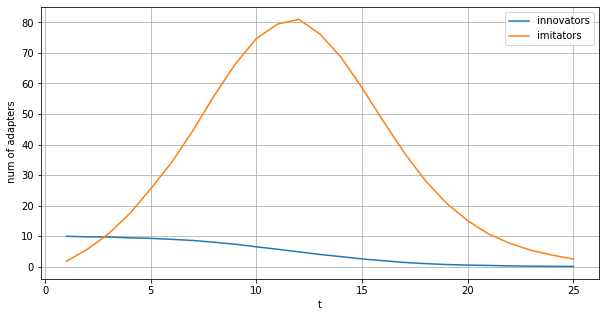

In [80]:
get_density_plot(vals)

In [85]:
""" check. """
params = {
    "network_size": 1000,
    "innovators": 0,
    "imitators": 0
}
MC = 1000

all_vals = []
for _ in range(MC):
    q_voter = BassDiffusionModel(**params)
    temp_vals = q_voter.simulate(0.2, 0.05)
    all_vals.append(temp_vals)


# get avg results:
vals = []
time = min(len(it) for it in all_vals)
for i in range(time):
    avg_innovator = np.mean([it[i][0] for it in all_vals])
    avg_imitator = np.mean([it[i][1] for it in all_vals])
    vals.append([avg_innovator, avg_imitator])

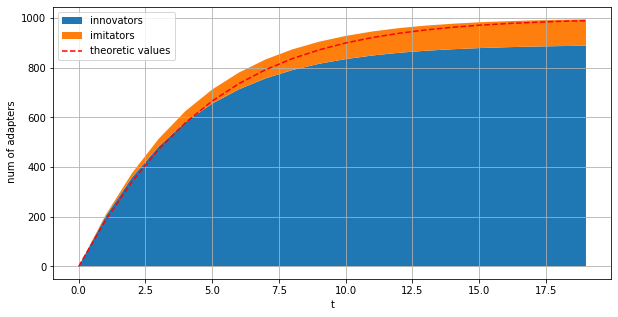

In [91]:
get_total_plot(vals, theo_vals={'p':0.2, 'q':0.05})

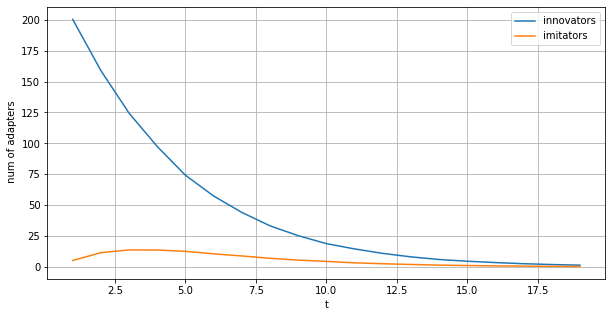

In [92]:
get_density_plot(vals)